In [97]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture

In [91]:
def Calc_absolute_magnitude(apparent_magnitude, distance):
    absolute_magnitude = apparent_magnitude - (2.5 * np.log10((distance / 10)**2))
    return absolute_magnitude

def Calc_parallax_distance(parallax):
    distance = 1 / (parallax * 10**-3)
    return distance

def Calc_luminosity(absolute_magnitude):
    solar_luminosity = 3.846 * 10**26
    luminosity = solar_luminosity * (10**(0.4 * (4.83 - absolute_magnitude)))
    luminosity_su = luminosity / solar_luminosity 
    return luminosity_su

def main_sequence_fit(log_teff, a, b, c):
    return a * log_teff**2 + b * log_teff + c

In [53]:
data_file = "C:/Users/ryewa/Downloads/1734116186768O-result.fits"

hdu_list = fits.open(data_file, memmap=True)
print(hdu_list.info())

Gaia_data = Table(hdu_list[1].data)

Filename: C:/Users/ryewa/Downloads/1734116186768O-result.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  votable       1 BinTableHDU     37   100000R x 5C   [D, E, E, E, E]   
None


In [55]:
teff = Gaia_data['teff_gspphot']
distance_parsec = Calc_parallax_distance(Gaia_data['parallax'])
magnitude = Calc_absolute_magnitude(Gaia_data['phot_bp_mean_mag'], distance_parsec)
luminosity = Calc_luminosity(magnitude)
valid = (teff > 0) & (luminosity > 0)  
teff = teff[valid]
luminosity = luminosity[valid]
log_teff = np.log10(teff)
log_luminosity = np.log10(luminosity)

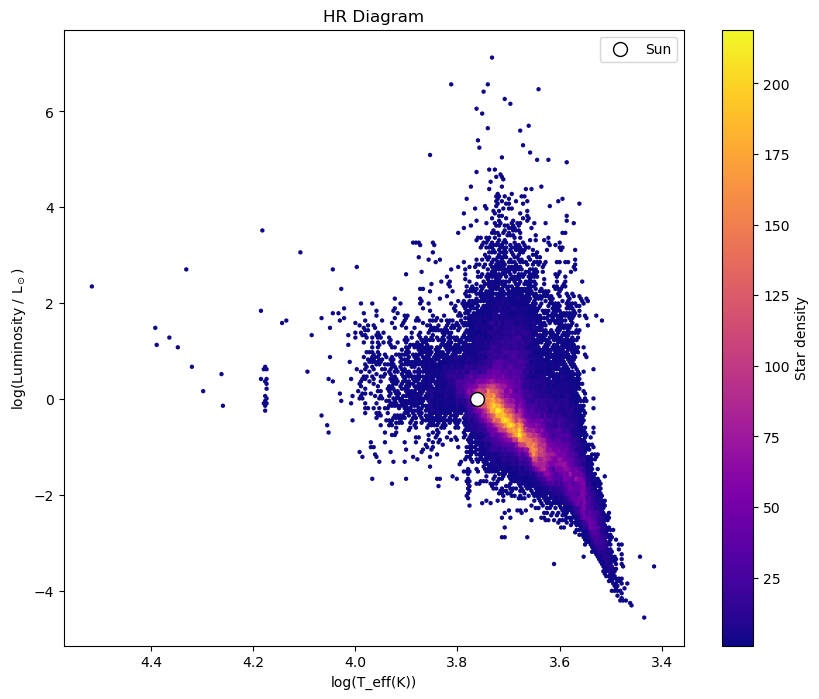

In [87]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(log_teff, log_luminosity, gridsize=200, cmap='plasma', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Star density')
plt.scatter(np.log10(5778), 0, color='white', edgecolor='black', label='Sun', zorder=5, s=100)
plt.xlabel('log(T_eff(K))')
plt.ylabel(r'log(Luminosity / L$_\odot$)')
plt.title('HR Diagram')
plt.gca().invert_xaxis()
plt.legend()
#plt.savefig('Hr Diagram')
plt.show()

In [ ]:
main_sequence_filter = (luminosity > 0.05) & (luminosity < 10) & (teff > 3900) & (teff < 8000)
main_sequence_teff = log_teff[main_sequence_filter]
main_sequence_luminosity = log_luminosity[main_sequence_filter]

popt, pcov = curve_fit(main_sequence_fit, main_sequence_teff, main_sequence_luminosity)

teff_fit = np.linspace(main_sequence_teff.min(), main_sequence_teff.max(), 100)
lum_fit = main_sequence_fit(teff_fit, *popt)


<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ryewa\AppData\Local\Temp\ipykernel_22488\1530468964.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('log(L / L$_\odot$)')


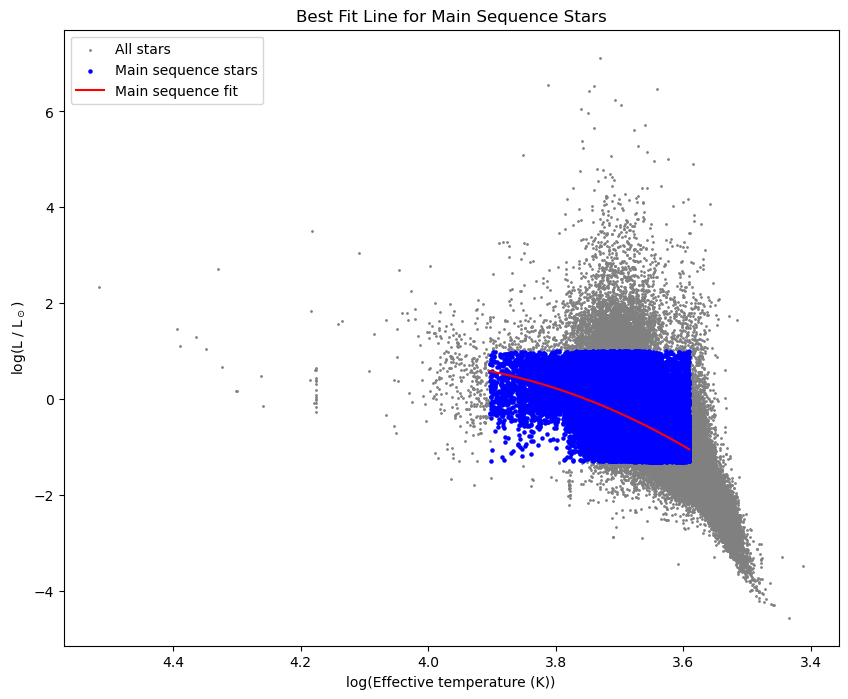

In [113]:
plt.figure(figsize=(10, 8))
plt.scatter(log_teff, log_luminosity, s=1, color='gray', label='All stars')
plt.scatter(main_sequence_teff, main_sequence_luminosity, s=5, color='blue', label='Main sequence stars')
plt.plot(teff_fit, lum_fit, color='red', label='Main sequence fit')
plt.gca().invert_xaxis()
plt.xlabel('log(Effective temperature (K))')
plt.ylabel('log(L / L$_\odot$)')
plt.title('Best Fit Line for Main Sequence Stars')
plt.legend()
#plt.savefig("Best Fit Hr")
plt.show()


In [135]:
X = np.vstack([np.log10(teff), np.log10(luminosity)]).T

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=90)
gmm.fit(X)
labels = gmm.predict(X)

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ryewa\AppData\Local\Temp\ipykernel_22488\3815747876.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('log(Luminosity / L$_\odot$)')


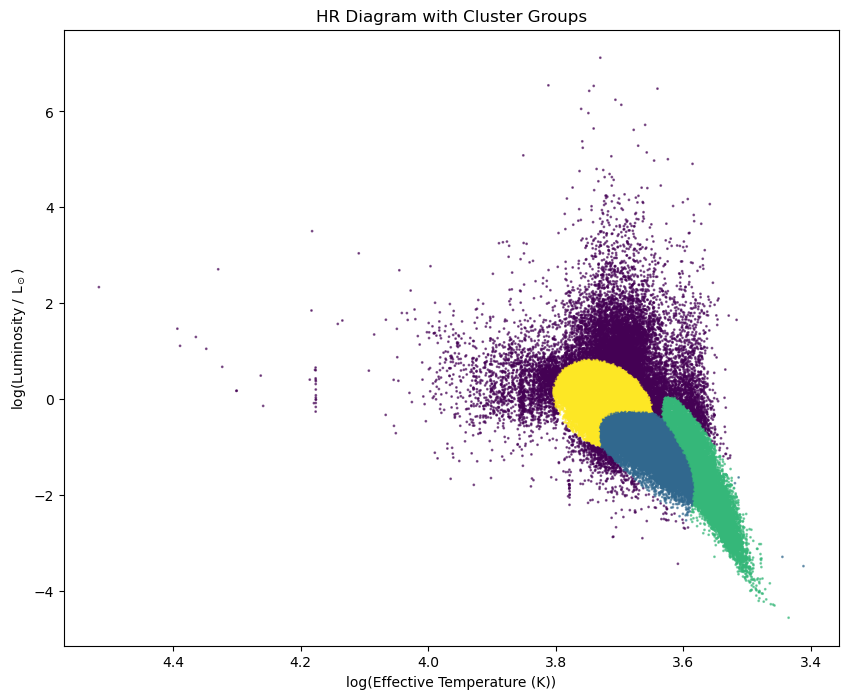

In [139]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(teff), np.log10(luminosity), c=labels, cmap='viridis', s=1, alpha=0.6)
plt.gca().invert_xaxis()
plt.xlabel('log(Effective Temperature (K))')
plt.ylabel('log(Luminosity / L$_\odot$)')
plt.title('HR Diagram with Cluster Groups')
#plt.savefig("Hr Cluster")
plt.show()

In [ ]:
giants_filter = (luminosity > 10) & (teff < 6000) & (teff > 3000)
giants_teff = teff[giants_filter]
giants_luminosity = luminosity[giants_filter]

log_teff_giants = np.log10(giants_teff)
log_luminosity_giants = np.log10(giants_luminosity)

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ryewa\AppData\Local\Temp\ipykernel_22488\1489918734.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('log(Luminosity / L$_\odot$)')


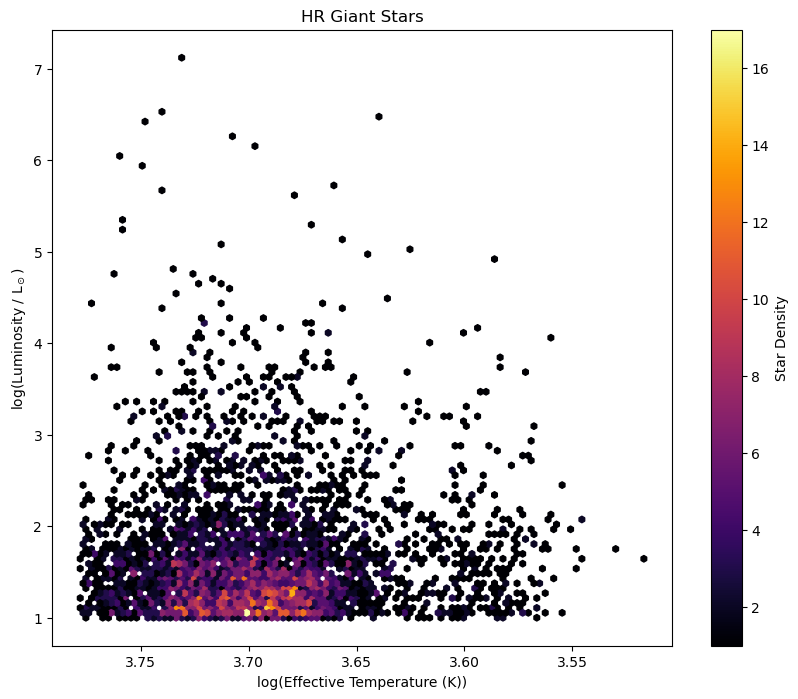

In [143]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    log_teff_giants, log_luminosity_giants, 
    gridsize=100, cmap='inferno', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Star Density')
plt.xlabel('log(Effective Temperature (K))')
plt.ylabel('log(Luminosity / L$_\odot$)')
plt.title('HR Giant Stars')
plt.gca().invert_xaxis()
plt.savefig("Hr Giants")
plt.show()